# Multi-variate Regression Metamodel with DOE based on random sampling
* Input variable space should be constructed using random sampling, not classical factorial DOE
* Linear fit is often inadequate but higher-order polynomial fits often leads to overfitting i.e. learns spurious, flawed relationships between input and output
* R-square fit can often be misleding measure in case of high-dimensional regression
* Metamodel can be constructed by selectively discovering features (or their combination) which matter and shrinking other high-order terms towards zero

#### LASSO: Least Absolute Shrinkage and Selection Operator
$$ {\displaystyle \min _{\beta _{0},\beta }\left\{{\frac {1}{N}}\sum _{i=1}^{N}(y_{i}-\beta _{0}-x_{i}^{T}\beta )^{2}\right\}{\text{ subject to }}\sum _{j=1}^{p}|\beta _{j}|\leq t.} $$

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Generate random feature vectors

In [2]:
X=np.array(10*np.random.randn(37,5))

In [5]:
X.shape

(37, 5)

In [3]:
df=pd.DataFrame(X,columns=['Feature'+str(l) for l in range(1,6)])

In [4]:
df.head()

,Feature1,Feature2,Feature3,Feature4,Feature5
0,0.457360,1.273426,-10.219700,-7.072615,4.735219
1,5.177841,3.219312,11.296868,17.435308,17.852550
2,-3.766527,15.406194,15.006862,-1.502581,-2.051585
3,-8.172667,-27.965941,5.938407,6.280625,3.767033
4,9.548238,18.337418,-5.108546,12.572577,4.813475


### Plot the random distributions of input features

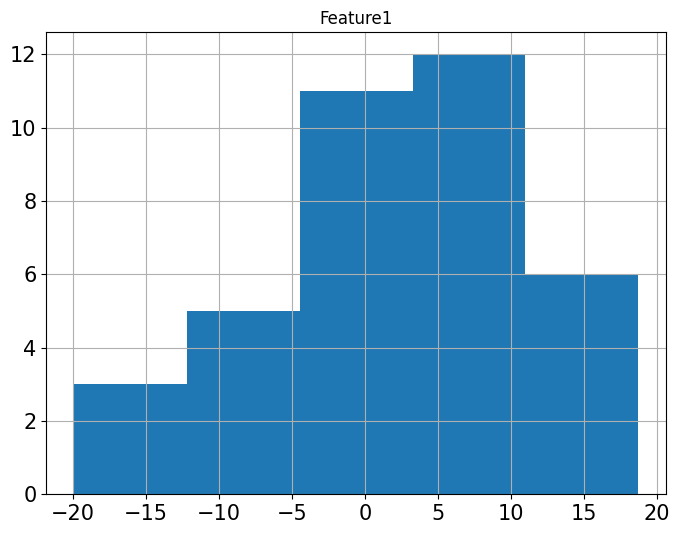

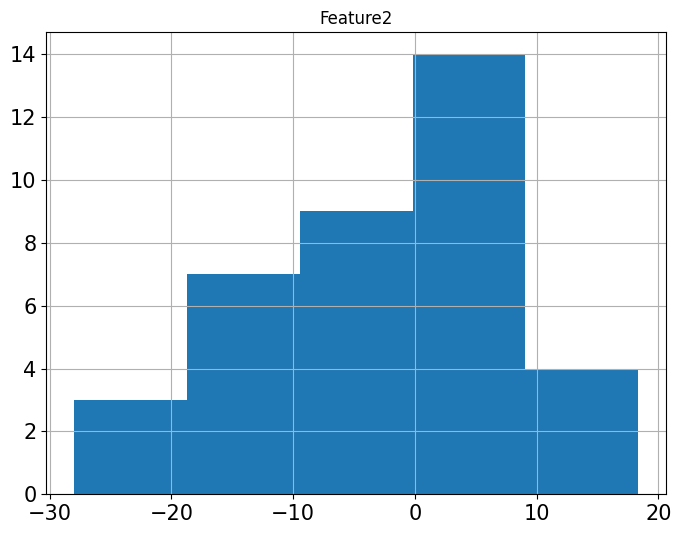

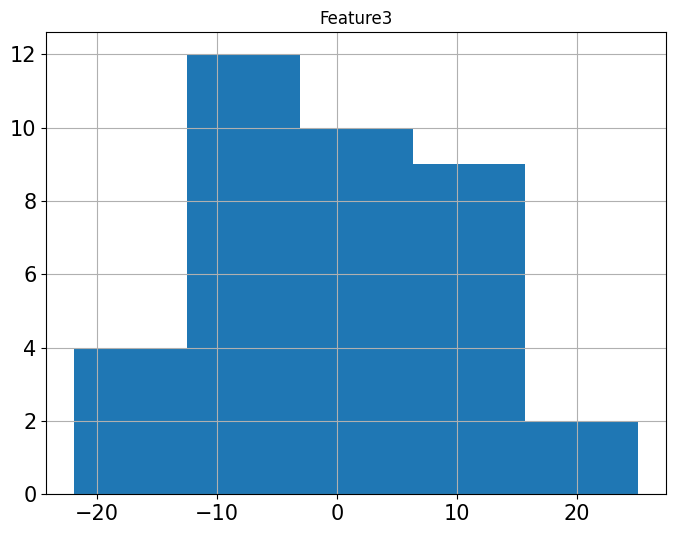

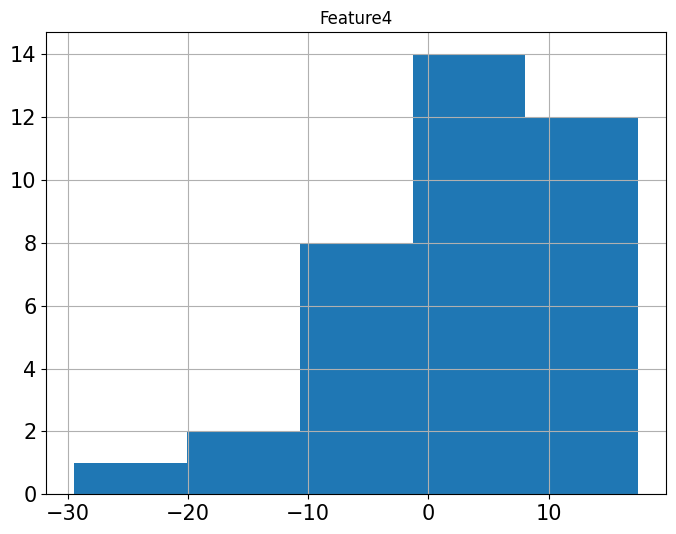

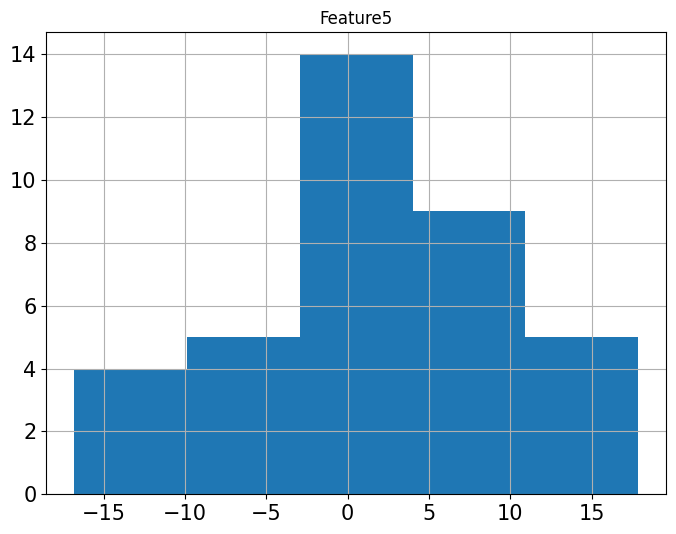

In [6]:
for i in df.columns:
    df.hist(i,bins=5,xlabelsize=15,ylabelsize=15,figsize=(8,6))

### Generate the output variable by analytic function + Gaussian noise (our goal will be to *'learn'* this function)

#### Let's construst the ground  truth  or  originating  function  as  follows: 
 
$$ y=f(x_1,x_2,x_3,x_4,x_5)= 5x_1^2+13x_2+0.1x_1x_3^2+2x_4x_5+0.1x_5^3+0.8x_1x_4x_5+\psi(x)\ :\ \psi(x) = {\displaystyle f(x\;|\;\mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}\;e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}}$$

In [7]:
df['y']=5*df['Feature1']**2+13*df['Feature2']+0.1*df['Feature3']**2*df['Feature1'] \
+2*df['Feature4']*df['Feature5']+0.1*df['Feature5']**3+0.8*df['Feature1']*df['Feature4']*df['Feature5'] \
+30*np.random.normal(loc=5,scale=2)

In [8]:
df.head()


,Feature1,Feature2,Feature3,Feature4,Feature5,y
0,0.457360,1.273426,-10.219700,-7.072615,4.735219,170.400783
1,5.177841,3.219312,11.296868,17.435308,17.852550,2939.478608
2,-3.766527,15.406194,15.006862,-1.502581,-2.051585,399.043408
3,-8.172667,-27.965941,5.938407,6.280625,3.767033,56.201611
4,9.548238,18.337418,-5.108546,12.572577,4.813475,1530.248313


### Plot single-variable scatterplots

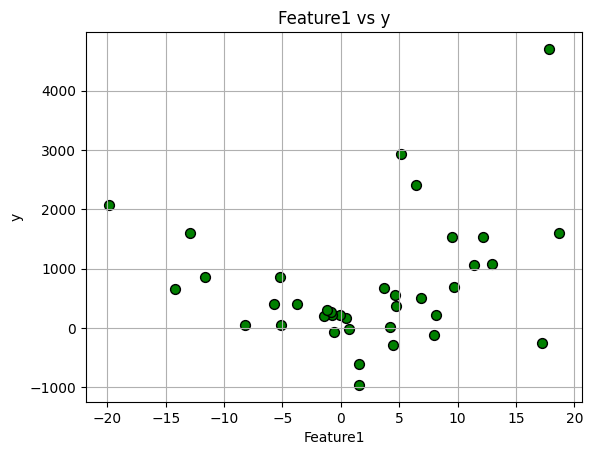

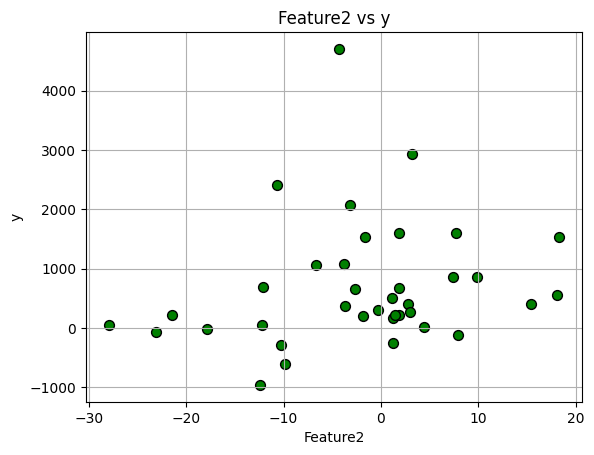

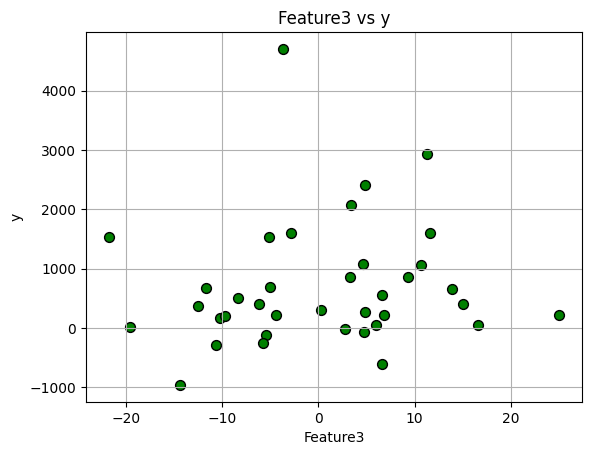

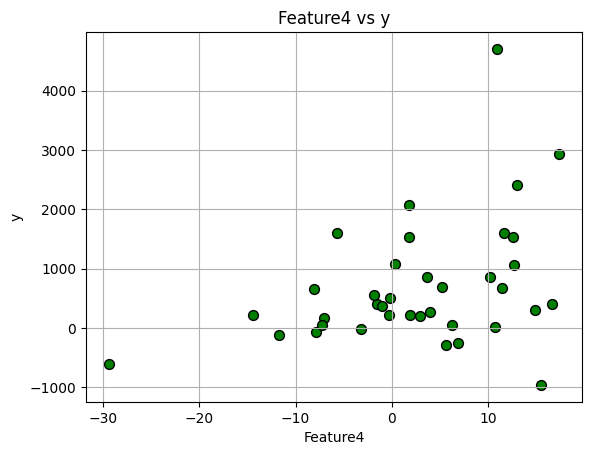

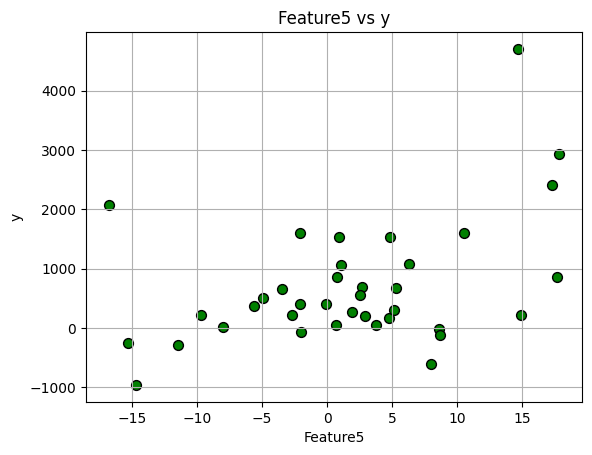

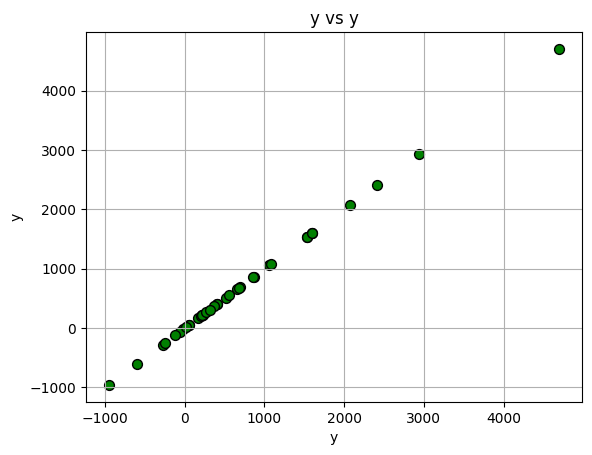

In [9]:
for i in df.columns:
    df.plot.scatter(i,'y', edgecolors=(0,0,0),s=50,c='g',grid=True, title= f"{i} vs y")


### Standard linear regression

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
linear_model = LinearRegression()

In [12]:
X_linear=df.drop('y',axis=1)
y_linear=df['y']

In [13]:
linear_model.fit(X_linear,y_linear)

LinearRegression()

In [14]:
y_pred_linear = linear_model.predict(X_linear)

### R-square of simple linear fit is very bad, coefficients have no meaning i.e. we did not 'learn' the function

In [15]:
RMSE_linear = np.sqrt(np.sum(np.square(y_pred_linear-y_linear)))

In [16]:
print("Root-mean-square error of linear model:",RMSE_linear)

Root-mean-square error of linear model: 4981.613052624599


In [17]:
coeff_linear = pd.DataFrame(linear_model.coef_,index=df.drop('y',axis=1).columns, columns=['Linear model coefficients'])
coeff_linear

,Linear model coefficients
Feature1,16.943009
Feature2,8.165993
Feature3,14.528021
Feature4,44.080151
Feature5,47.377894


In [18]:
print ("R2 value of linear model:",linear_model.score(X_linear,y_linear))

R2 value of linear model: 0.3866204876185033


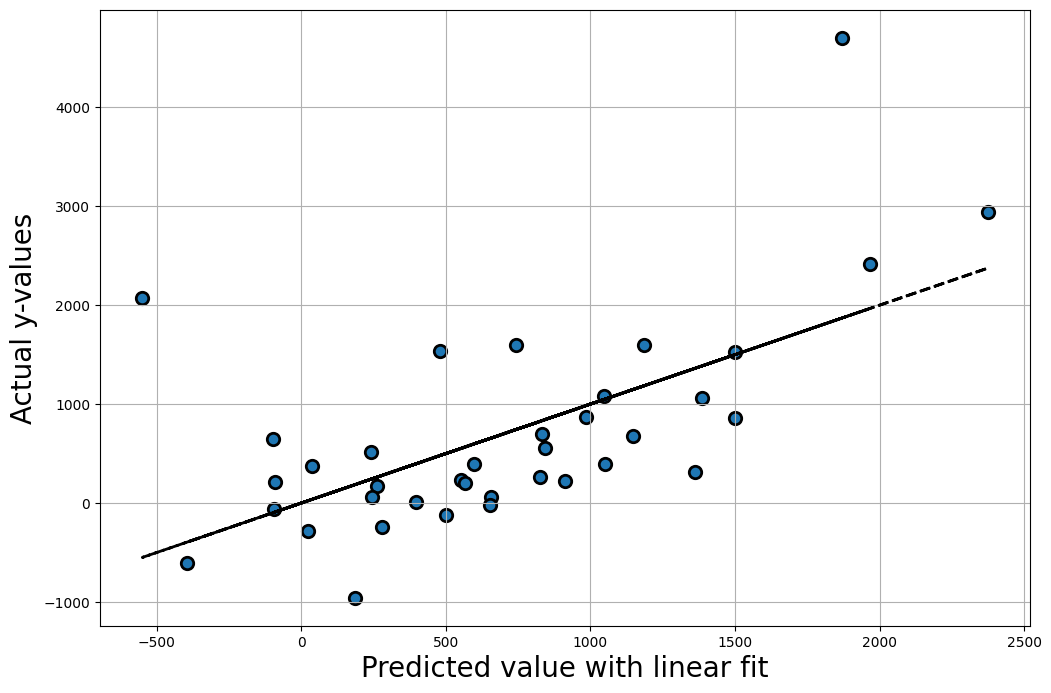

In [19]:
plt.figure(figsize=(12,8))
plt.xlabel("Predicted value with linear fit",fontsize=20)
plt.ylabel("Actual y-values",fontsize=20)
plt.grid(1)
plt.scatter(y_pred_linear,y_linear,edgecolors=(0,0,0),lw=2,s=80)
plt.plot(y_pred_linear,y_pred_linear, 'k--', lw=2)

### Create polynomial features

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
poly = PolynomialFeatures(3,include_bias=False)

In [22]:
X_poly = poly.fit_transform(X)
X_poly_feature_name = poly.get_feature_names_out(['Feature'+str(l) for l in range(1,6)])
print(X_poly_feature_name)
print(len(X_poly_feature_name))

['Feature1' 'Feature2' 'Feature3' 'Feature4' 'Feature5' 'Feature1^2'
 'Feature1 Feature2' 'Feature1 Feature3' 'Feature1 Feature4'
 'Feature1 Feature5' 'Feature2^2' 'Feature2 Feature3' 'Feature2 Feature4'
 'Feature2 Feature5' 'Feature3^2' 'Feature3 Feature4' 'Feature3 Feature5'
 'Feature4^2' 'Feature4 Feature5' 'Feature5^2' 'Feature1^3'
 'Feature1^2 Feature2' 'Feature1^2 Feature3' 'Feature1^2 Feature4'
 'Feature1^2 Feature5' 'Feature1 Feature2^2' 'Feature1 Feature2 Feature3'
 'Feature1 Feature2 Feature4' 'Feature1 Feature2 Feature5'
 'Feature1 Feature3^2' 'Feature1 Feature3 Feature4'
 'Feature1 Feature3 Feature5' 'Feature1 Feature4^2'
 'Feature1 Feature4 Feature5' 'Feature1 Feature5^2' 'Feature2^3'
 'Feature2^2 Feature3' 'Feature2^2 Feature4' 'Feature2^2 Feature5'
 'Feature2 Feature3^2' 'Feature2 Feature3 Feature4'
 'Feature2 Feature3 Feature5' 'Feature2 Feature4^2'
 'Feature2 Feature4 Feature5' 'Feature2 Feature5^2' 'Feature3^3'
 'Feature3^2 Feature4' 'Feature3^2 Feature5' 'Feature3 Fe

In [23]:
df_poly = pd.DataFrame(X_poly, columns=X_poly_feature_name)
df_poly.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature1^2,Feature1 Feature2,Feature1 Feature3,Feature1 Feature4,Feature1 Feature5,...,Feature3^3,Feature3^2 Feature4,Feature3^2 Feature5,Feature3 Feature4^2,Feature3 Feature4 Feature5,Feature3 Feature5^2,Feature4^3,Feature4^2 Feature5,Feature4 Feature5^2,Feature5^3
0,0.457360,1.273426,-10.219700,-7.072615,4.735219,0.209178,0.582415,-4.674085,-3.234733,2.165701,...,-1067.368651,-738.679944,494.556962,-511.208624,342.261606,-229.149122,-353.785505,236.864540,-158.584253,106.174463
1,5.177841,3.219312,11.296868,17.435308,17.852550,26.810034,16.669084,58.493385,90.277245,92.437659,...,1441.697740,2225.080665,2278.328813,3434.134511,3516.316387,3600.464947,5300.158338,5426.995814,5556.868624,5689.849404
2,-3.766527,15.406194,15.006862,-1.502581,-2.051585,14.186722,-58.027840,-56.523745,5.659512,7.727349,...,3379.634157,-338.390203,-462.029072,33.881753,46.261253,63.163897,-3.392454,-4.631967,-6.324366,-8.635123
3,-8.172667,-27.965941,5.938407,6.280625,3.767033,66.792478,228.556309,-48.532619,-51.329451,-30.786705,...,209.415999,221.484195,132.843202,234.247856,140.498672,84.269189,247.747059,148.595310,89.125442,53.456226
4,9.548238,18.337418,-5.108546,12.572577,4.813475,91.168847,175.090025,-48.777613,120.045957,45.960206,...,-133.318967,328.109597,125.618430,-807.506309,-309.157904,-118.362678,1987.343395,760.864543,291.300866,111.526020


In [24]:
df_poly['y']=df['y']
df_poly.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature1^2,Feature1 Feature2,Feature1 Feature3,Feature1 Feature4,Feature1 Feature5,...,Feature3^2 Feature4,Feature3^2 Feature5,Feature3 Feature4^2,Feature3 Feature4 Feature5,Feature3 Feature5^2,Feature4^3,Feature4^2 Feature5,Feature4 Feature5^2,Feature5^3,y
0,0.457360,1.273426,-10.219700,-7.072615,4.735219,0.209178,0.582415,-4.674085,-3.234733,2.165701,...,-738.679944,494.556962,-511.208624,342.261606,-229.149122,-353.785505,236.864540,-158.584253,106.174463,170.400783
1,5.177841,3.219312,11.296868,17.435308,17.852550,26.810034,16.669084,58.493385,90.277245,92.437659,...,2225.080665,2278.328813,3434.134511,3516.316387,3600.464947,5300.158338,5426.995814,5556.868624,5689.849404,2939.478608
2,-3.766527,15.406194,15.006862,-1.502581,-2.051585,14.186722,-58.027840,-56.523745,5.659512,7.727349,...,-338.390203,-462.029072,33.881753,46.261253,63.163897,-3.392454,-4.631967,-6.324366,-8.635123,399.043408
3,-8.172667,-27.965941,5.938407,6.280625,3.767033,66.792478,228.556309,-48.532619,-51.329451,-30.786705,...,221.484195,132.843202,234.247856,140.498672,84.269189,247.747059,148.595310,89.125442,53.456226,56.201611
4,9.548238,18.337418,-5.108546,12.572577,4.813475,91.168847,175.090025,-48.777613,120.045957,45.960206,...,328.109597,125.618430,-807.506309,-309.157904,-118.362678,1987.343395,760.864543,291.300866,111.526020,1530.248313


In [25]:
X_train=df_poly.drop('y',axis=1)
y_train=df_poly['y']

### Polynomial model without regularization and cross-validation

In [26]:
poly = LinearRegression()

In [27]:
model_poly=poly.fit(X_train,y_train)
y_poly = poly.predict(X_train)
RMSE_poly=np.sqrt(np.sum(np.square(y_poly-y_train)))
print("Root-mean-square error of simple polynomial model:",RMSE_poly)

Root-mean-square error of simple polynomial model: 3.4380178398200535e-11


In [28]:
coeff_poly = pd.DataFrame(model_poly.coef_,index=df_poly.drop('y',axis=1).columns, 
                          columns=['Coefficients polynomial model'])
coeff_poly

,Coefficients polynomial model
Feature1,0.007973
Feature2,0.050157
Feature3,0.035591
Feature4,0.018492
Feature5,0.017058
Feature1^2,1.027301
Feature1 Feature2,0.425753
Feature1 Feature3,-0.540112
Feature1 Feature4,-0.016201
Feature1 Feature5,0.448643


#### R-square value of the simple polynomial model is perfect but the model is flawed as shown above i.e. it learned wrong coefficients and overfitted the to the data

In [29]:
print ("R2 value of simple polynomial model:",model_poly.score(X_train,y_train))

R2 value of simple polynomial model: 1.0


### Metamodel - polynomial model with cross-validation and LASSO regularization
** This is an advanced machine learning method which prevents over-fitting by penalizing high-valued coefficients i.e. keep them bounded **

In [30]:
from sklearn.linear_model import LassoCV

In [31]:
model1 = LassoCV(cv=10,verbose=0,eps=0.001,n_alphas=100, tol=0.0001,max_iter=5000)

In [32]:
model1.fit(X_train,y_train)

LassoCV(cv=10, max_iter=5000, verbose=0)

In [33]:
y_pred1 = np.array(model1.predict(X_train))

In [34]:
RMSE_1=np.sqrt(np.sum(np.square(y_pred1-y_train)))
print("Root-mean-square error of Metamodel:",RMSE_1)

Root-mean-square error of Metamodel: 299.81245378782376


In [35]:
coeff1 = pd.DataFrame(model1.coef_,index=df_poly.drop('y',axis=1).columns, columns=['Coefficients Metamodel'])
coeff1

,Coefficients Metamodel
Feature1,0.000000
Feature2,0.000000
Feature3,0.000000
Feature4,0.000000
Feature5,0.000000
Feature1^2,3.956945
Feature1 Feature2,0.000000
Feature1 Feature3,-0.000000
Feature1 Feature4,0.000000
Feature1 Feature5,0.000000


In [36]:
model1.score(X_train,y_train)

0.9977782835921676

In [37]:
model1.alpha_

np.float64(1585.3266961574086)

#### Recall that the ground  truth  or  originating  function  is  as  follows: 
 
$$ y=f(x_1,x_2,x_3,x_4,x_5)= 5x_1^2+13x_2+0.1x_1x_3^2+2x_4x_5+0.1x_5^3+0.8x_1x_4x_5+\psi(x) $$

### Printing only the non-zero coefficients of the *metamodel*

In [38]:
coeff1[coeff1['Coefficients Metamodel']!=0]

,Coefficients Metamodel
Feature1^2,3.956945
Feature3^2,-0.086818
Feature1^3,0.026709
Feature1^2 Feature2,-0.046144
Feature1^2 Feature3,0.046072
Feature1^2 Feature4,0.067525
Feature1 Feature2^2,0.022788
Feature1 Feature3 Feature4,0.083626
Feature1 Feature4^2,0.006611
Feature1 Feature4 Feature5,0.791516


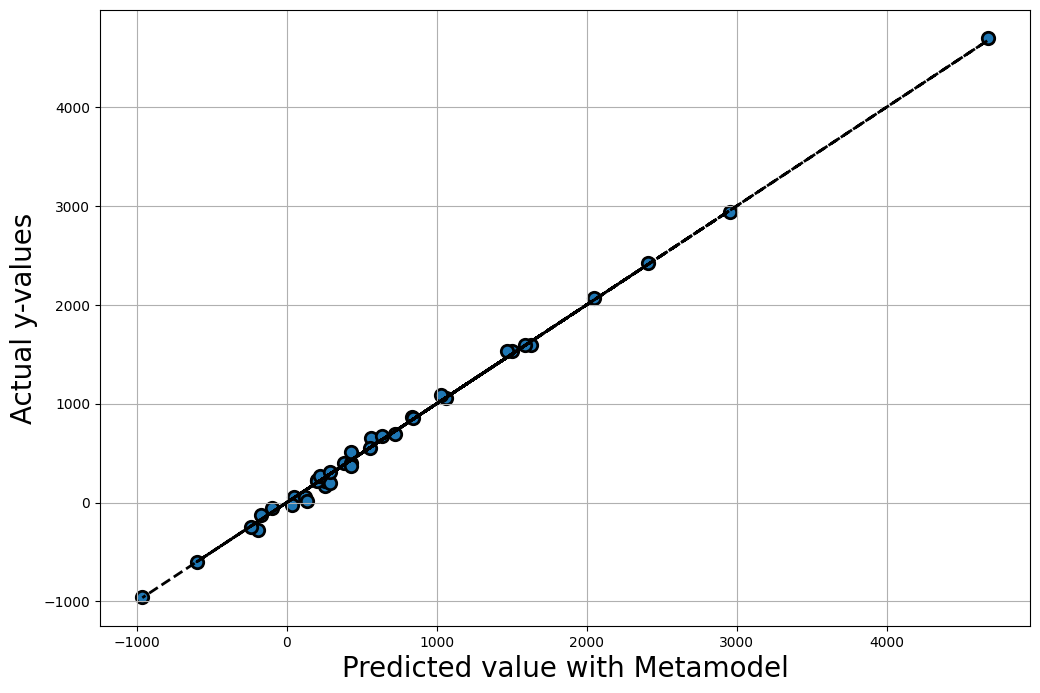

In [39]:
plt.figure(figsize=(12,8))
plt.xlabel("Predicted value with Metamodel",fontsize=20)
plt.ylabel("Actual y-values",fontsize=20)
plt.grid(1)
plt.scatter(y_pred1,y_train,edgecolors=(0,0,0),lw=2,s=80)
plt.plot(y_pred1,y_pred1, 'k--', lw=2)

(np.float64(-6.289512712394535),
 np.float64(-2.989512712394535),
 np.float64(-307354.69441158656),
 np.float64(6559492.567409144))

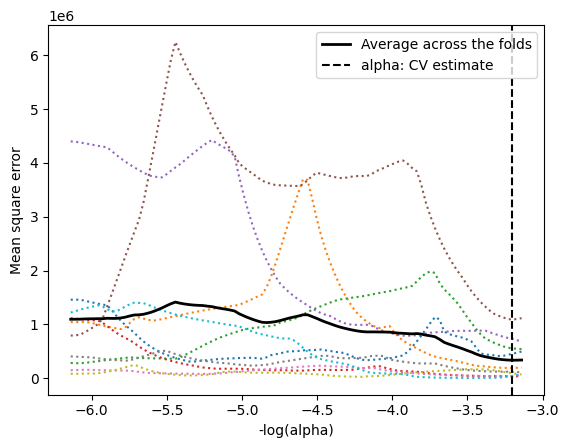

In [40]:
# Display results
m_log_alphas = -np.log10(model1.alphas_)

plt.figure()
ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, model1.mse_path_, ':')
plt.plot(m_log_alphas, model1.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model1.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')
plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.axis('tight')